In [261]:
import kagglehub
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(f"{path}/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [264]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [265]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [266]:
corr_matrix = df.drop("Extracurricular Activities", axis = 1).corr().round(2)
corr_matrix

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.00,-0.01,0.00,0.02,0.37
Previous Scores,-0.01,1.00,0.01,0.01,0.92
Sleep Hours,0.00,0.01,1.00,0.00,0.05
Sample Question Papers Practiced,0.02,0.01,0.00,1.00,0.04
Performance Index,0.37,0.92,0.05,0.04,1.00


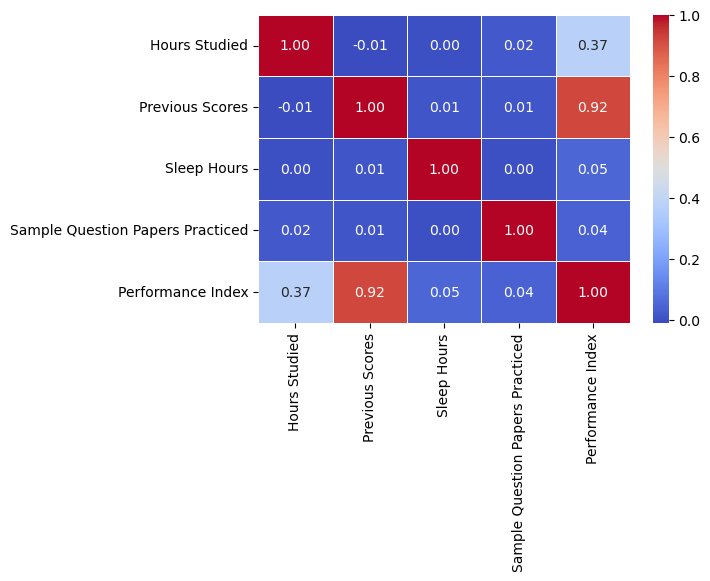

In [267]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

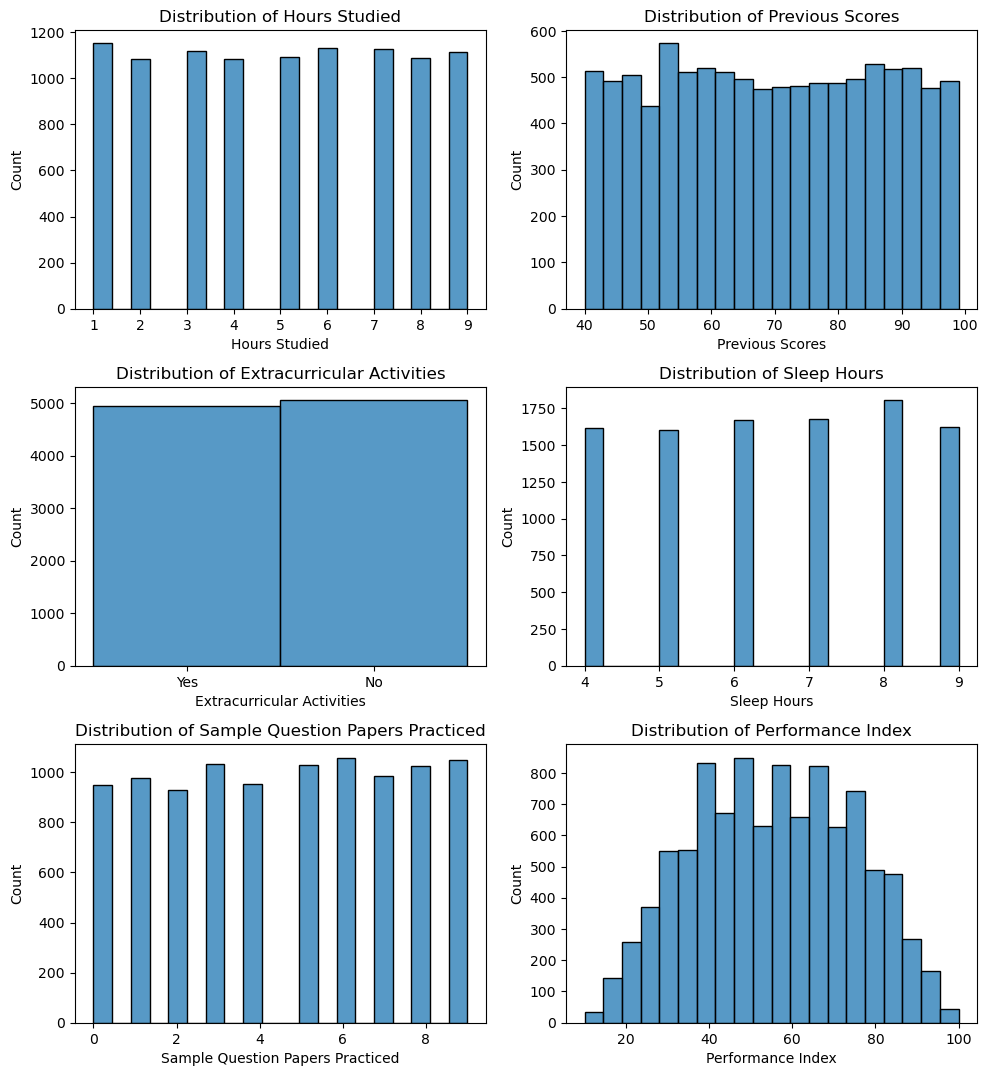

In [268]:
plt.figure(figsize=(10,14))

categories = df.columns
rows = len(categories) // 2 + 1

for i, c in enumerate(categories):
    plt.subplot(rows,2,i+1)
    sns.histplot(df[c], bins=20)
    plt.title(f"Distribution of {c}")
    plt.xlabel("Count")
    plt.xlabel(f"{c}")

plt.tight_layout() 
plt.show()

In [269]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Transform categorical data
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes":1,"No":0})

# Define X and y
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standard Scaling to avoid features with larger scales dominating others
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}, R²: {r2:.2f}")

Mean Squared Error (MSE): 4.08, R²: 0.99


In [ ]:
"""
MSE (4.08) suggests that the average prediction error is low, but it is helpful to compare it to the scale of the target variable (Performance Index). 
If the Performance Index ranges from 10 to 100, an MSE of 4.08 is small, indicating that the model is making very accurate predictions on average.
R² (0.99) indicates that the model explains almost all of the variability in the Performance Index. This is a great result, implying that the model's predictions are almost as accurate as the actual values.
"""

In [284]:
# Calculate regression equation
intercept = model.intercept_
coefficients = model.coef_
feature_names = X.columns

equation = f"Performance Index = {intercept:.2f}"
for i in range(len(coefficients)):
    equation += f" + ({coefficients[i]:.2f}) * {feature_names[i]}"

print(f"Regression Equation: {equation}")

Regression Equation: Performance Index = 55.31 + (7.40) * Hours Studied + (17.64) * Previous Scores + (0.30) * Extracurricular Activities + (0.81) * Sleep Hours + (0.55) * Sample Question Papers Practiced
